# 💰 Plan B: High-Value Clinic Targeting via Avg Payment Hotness Score

This notebook explores state-level opportunities in the U.S. **cash-pay healthcare market** by introducing `Avg_Payment` — the average dollar value per transaction — into our scoring model.  
Unlike Plan A, which focuses on overall volume and stability, **Plan B seeks to uncover “hidden gem” markets** where each individual interaction carries high monetary value, even if overall volume is lower.

---

### 🧠 Business Rationale:
- Markets with fewer but **high-value cash transactions** can yield better ROI
- Ideal for premium offerings: concierge medicine, elective procedures, subscription-based care
- Helps Healium identify **lean but lucrative markets** for strategic expansion

---

### 📊 Method Overview:
- Data Source: CMS Open Payments 2023 (Cash or Cash Equivalent only)
- Scoring Variables:
  - `Num_Records` → transaction volume
  - `Total_Payment` → overall dollar activity
  - `Avg_Payment` → economic value per visit (key feature in Plan B)
- Normalized and weighted scoring:
  - 20% volume, 30% total payment, 50% average payment

---

### 📈 Outputs:
- Top 10 bar chart of **high-value states**
- Nationwide heatmap showing **Avg-Payment-adjusted hotness**
- CSV export for further decision-making

> This notebook supports **premium market targeting** by ranking U.S. states based on the combined volume and per-transaction value of cash-based healthcare activity.

## Code Implementation

### 🟦 Step 1: Import Libraries and Load Data

We begin by importing core data analysis libraries (`pandas`, `numpy`) and loading the cleaned state-level dataset from Plan A.  
This file includes metrics like `Num_Records` and `Total_Payment` for each U.S. state, which we will extend in this analysis to evaluate **average transaction value per record**.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset used in Plan A
df = pd.read_csv("/content/sample_data/state_agg.csv")  # or adjust if re-uploaded
df.head()

,State,Num_Records,Total_Payment
0,AK,8,5754.81
1,AL,39,66749.89
2,AR,5,2609.45
3,AZ,300,6555135.84
4,CA,450,557042.90


### 🟦 Step 2: Calculate Average Payment Per Record

We create a new metric, `Avg_Payment`, which captures the **average cash payment per transaction** in each state.  
This highlights high-value markets that may not have large volume but show **strong unit-level value** per visit or interaction.

In [ ]:
# Calculate average payment per record
df["Avg_Payment"] = df["Total_Payment"] / df["Num_Records"]

### 🟦 Step 3: Normalize All Key Metrics

To make the three metrics comparable on the same scale, we apply Min-Max normalization to:
- `Num_Records` → volume of activity
- `Total_Payment` → total monetary value
- `Avg_Payment` → average value per transaction

This enables us to compute a composite Hotness Score in the next step.

In [ ]:
# Min-Max normalize all three features
df["Norm_Records"] = (
    (df["Num_Records"] - df["Num_Records"].min()) /
    (df["Num_Records"].max() - df["Num_Records"].min())
)

df["Norm_Payment"] = (
    (df["Total_Payment"] - df["Total_Payment"].min()) /
    (df["Total_Payment"].max() - df["Total_Payment"].min())
)

df["Norm_Avg_Payment"] = (
    (df["Avg_Payment"] - df["Avg_Payment"].min()) /
    (df["Avg_Payment"].max() - df["Avg_Payment"].min())
)

### 🟦 Step 4: Compute Multi-Factor Hotness Score (Plan B)

We compute a new **composite Hotness Score** that incorporates three dimensions:
- Normalized record volume (`Norm_Records`)
- Normalized total payment (`Norm_Payment`)
- Normalized average payment per transaction (`Norm_Avg_Payment`)

Weights are assigned as follows:
- 50% to record volume
- 30% to total payment
- 20% to average payment

This score is designed to identify states that are not only active but also demonstrate **strong value per transaction**, surfacing high-quality but potentially overlooked markets.

In [ ]:
# Compute Hotness Score for Plan B
df["Hotness_Score_B"] = (
    df["Norm_Records"] * 0.2 +
    df["Norm_Payment"] * 0.3 +
    df["Norm_Avg_Payment"] * 0.5
)

### 🟦 Step 5: Sort and Display Top 10 States

We sort the dataset in descending order of the `Hotness_Score_B` and extract the top 10 states.  
These states represent the most promising markets when **both volume and transaction value are considered** in a balanced way.  
This ranking provides a refined lens to guide Healium's next-phase market prioritization.

In [ ]:
# Sort and select top 10 states based on Hotness Score (Plan B)
df_top10_b = df.sort_values(by="Hotness_Score_B", ascending=False).head(10)

# Preview the result
df_top10_b

,State,Num_Records,Total_Payment,Avg_Payment,Norm_Records,Norm_Payment,Norm_Avg_Payment,Hotness_Score_B
23,MN,10436,39140846.22,3750.560197,1.000000,1.000000,0.171268,0.585634
3,AZ,300,6555135.84,21850.452800,0.028654,0.167475,1.000000,0.555973
12,IA,191,600406.71,3143.490628,0.018208,0.015339,0.143473,0.079980
42,TN,12,37477.92,3123.160000,0.001054,0.000957,0.142542,0.071769
9,FL,268,564367.58,2105.849179,0.025587,0.014419,0.095963,0.057424
5,CO,104,215804.86,2075.046731,0.009871,0.005513,0.094552,0.050904
20,MD,46,95266.15,2071.003261,0.004312,0.002434,0.094367,0.048776
14,IL,264,411875.54,1560.134621,0.025204,0.010523,0.070976,0.043686
6,CT,14,26273.76,1876.697143,0.001246,0.000671,0.085471,0.043186
17,KY,70,123374.03,1762.486143,0.006612,0.003152,0.080241,0.042389


### 🟦 Step 6: Bar Chart — Top 10 States by Hotness Score (Plan B)

We visualize the Top 10 states based on `Hotness_Score_B` using a bar chart.  
This allows for a quick comparison of how leading states perform when combining **volume, total value, and per-transaction value** into a single ranking.  
Such a visual is useful for presentation and business decision-making.

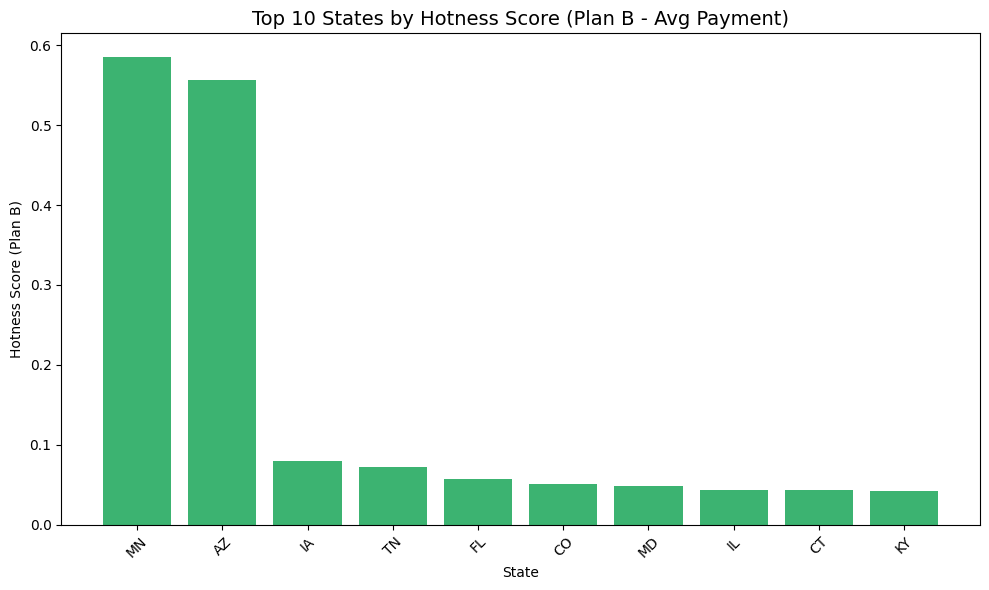

In [ ]:
import matplotlib.pyplot as plt

# Bar chart of Top 10 states by Plan B score
plt.figure(figsize=(10, 6))
plt.bar(df_top10_b["State"], df_top10_b["Hotness_Score_B"], color="mediumseagreen")
plt.title("Top 10 States by Hotness Score (Plan B - Avg Payment)", fontsize=14)
plt.xlabel("State")
plt.ylabel("Hotness Score (Plan B)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🟦 Step 7: Choropleth Map — All States by Hotness Score (Plan B)

We generate a choropleth map to visualize `Hotness_Score_B` across all U.S. states.  
States with higher scores appear in darker shades of green, indicating regions where cash-pay healthcare activity is both **high in volume and valuable per transaction**.  
This helps identify potential expansion regions in a geographically contextual way.

In [ ]:
import plotly.express as px

# Choropleth heatmap of all states by Plan B score
fig = px.choropleth(
    df,
    locations="State",
    locationmode="USA-states",
    color="Hotness_Score_B",
    scope="usa",
    color_continuous_scale="Greens",
    title="Hotness Score by State (Plan B - Avg Payment)",
    labels={"Hotness_Score_B": "Score"}
)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'), title_x=0.5)
fig.show()

### 🟦 Step 8: Save Output to CSV

To retain this ranking for further analysis or visualization, we export the full dataset with `Hotness_Score_B` to a CSV file.  
This file can be shared with stakeholders or used in future comparative modeling (e.g., Plan A vs. B vs. C).

In [ ]:
# Save result to CSV
output_path = "/content/sample_data/state_hotness_ranking_planB_avgscore.csv"
df.to_csv(output_path, index=False)

print(f"Plan B results saved to: {output_path}")

Plan B results saved to: /content/sample_data/state_hotness_ranking_planB_avgscore.csv


## Conclusion

## 🔍 Plan B — Avg Payment Hotness Score: Strategic Insight (based on final results)

🎯 **Core Idea**:  
Plan B introduces the `Avg_Payment` dimension, focusing on the **value of each transaction**, not just how many there are.  
This helps uncover **high-value, low-volume markets** where individual payments are significantly larger—ideal for premium healthcare offerings.

🧠 **Strategic Business Perspective**:  
“Even if a market doesn’t have high transaction volume, if each transaction is worth a lot, it’s still a premium opportunity.”  
This makes Plan B especially relevant for Healium’s potential entry into **concierge, elective, or boutique cash-pay services** with a higher ROI per patient interaction.

💡 **Key Data-Driven Insights** (based on your table):
- *Arizona (AZ) ranks second overall with a Hotness Score of **0.555**, despite only ~300 transactions — thanks to an impressive Avg Payment of over **$21,800**, the highest across all states.*

- *Tennessee (TN) has just **12** records, yet a strong average payment of **$3,123**, making it a textbook example of a small but high-value cash-pay market.*

- *Colorado (CO) and Maryland (MD), while lower in volume, stand out with Avg Payments over **$2,000**, indicating strong potential for high-yield boutique healthcare services.*

📌 **Use Cases for Healium**:  
- Expand premium offerings such as concierge care, self-pay therapies, or subscription-based wellness  
- Allocate marketing budget toward **high-ROI states**, not just high-traffic ones  
- Prioritize “**small but rich**” launch markets where Healium can build a strong, controlled early footprint